In [1]:
import numpy as np
import os
import imageio
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy import stats

## Generalized | Power mean
$$M_p(x_1,\ldots,x_n)=\left(
\frac{1}{n}\sum_{i=1}^{n}{x_i^p}
\right)^\frac{1}{p}$$

In [2]:
def gen_mean(x,y,p):
    if round(p,2) == 0.:
        return stats.gmean([x,y])
    if round(p,2) == 1.:
        return np.mean([x,y], axis = 0)
    else:
        return ((x**p+y**p)/2)**(1/p)

In [3]:
n = 100
x = np.linspace(0.001,0.999,n)
y = np.linspace(0.999,0.001,n)

XX, YY = np.meshgrid(x, y)

P = np.concatenate([np.logspace(2,-1,20)*(-1),
                    [0],
                    np.logspace(-1,2,20)])+1
P = np.concatenate([P,P[::-1]])
A = np.zeros((n,n,len(P)))

for i, p in enumerate(P):
    A[:,:,i] = gen_mean(XX, YY, p)

In [4]:
filenames = []
for i, p in enumerate(P):
    
    fig, ax = plt.subplots()

    img = ax.imshow(
        A[:,:,i],
        extent=[0,1,0,1])

    cntr = ax.contour(
        A[:,:,i],
        levels =[0.2,0.4,0.6,0.8],
        extent=[0,1,1,0],
        colors = 'white')

    ax.set_title('p = '+str(round(p,1)))
    ax.set_ylabel(r'$x_1$')
    ax.set_xlabel(r'$x_2$')
    cbar = fig.colorbar(img)

    filename = 's'+str(i)+'.png'
    plt.savefig(filename, transparent = False, facecolor = 'white', bbox_inches = 'tight', dpi=72)
    plt.close()
    filenames.append(filename)
    
with imageio.get_writer('mean.gif', mode='I', fps = 10) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
for filename in set(filenames):
    os.remove(filename)

$for~x_1, x_2 \in (0..1),~y_{(p)} = M_p(x_1,x_2):$
<img src='mean.gif' align='center'>

## Special cases

minimum, $p \to -\infty$:\
$$min\{x_1,x_2,...,x_n\}$$\
\
harmonic, $p=-1$:\
$$\frac{n}{\frac{1}{x_1}+\frac{1}{x_2}+\ldots+\frac{1}{x_n}}$$\
\
geometric, $p \to 0$:\
$$\sqrt[n]{x_1\cdot x_2\cdot \ldots \cdot x_n}$$\
\
arithmetic, $p=1$:\
$$\frac{x_1+x_2+\ldots+x_n}{n}$$\
\
quadratic, $p=2$:\
$$\sqrt{\frac{x_1^2+x_2^2+\ldots+x_n^2}{n}}$$\
\
maximum, $p \to \infty$:\
$$max\{x_1,x_2,...,x_n\}$$

In [5]:
am = np.mean([XX,YY], axis = 0)
gm = stats.gmean([XX,YY])
hm = stats.hmean([XX,YY])
qm = np.sqrt(np.mean([XX**2,YY**2], axis = 0))
min_ = np.min([XX,YY], axis = 0)
max_ = np.max([XX,YY], axis = 0)

means = {'minimum':min_,
'harmonic':hm,
'geometric':gm,
'arithmetic':am,
'quadratic':qm,
'maximum':max_}

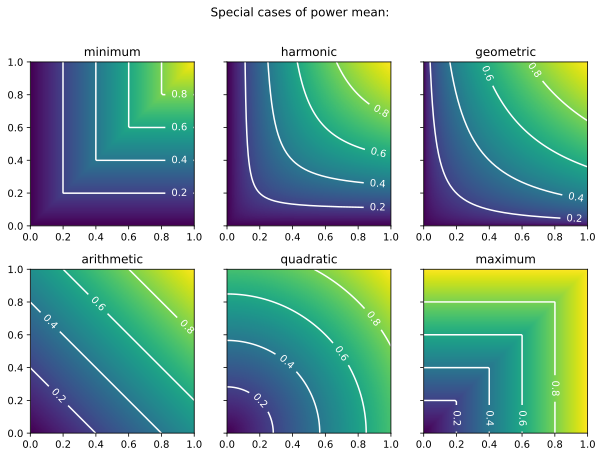

In [6]:
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(2,len(means)//2, figsize = (10,7), sharey = True)
fig.suptitle('Special cases of power mean:')

rows = 2
o = len(means)//rows

for i,j in enumerate(means.keys()):
    img = ax[i//o,i%o].imshow(means[j],
                      extent=[0,1,0,1])  
    cntr = ax[i//o,i%o].contour(means[j],
                       levels =[0.2,0.4,0.6,0.8],
                       extent=[0,1,1,0],
                       colors = 'white')
    ax[i//o,i%o].clabel(cntr, fmt='%1.1f')
    ax[i//o,i%o].set_title(j)
    ax[i//o,i%o].xaxis.set_major_formatter(FormatStrFormatter('%1.1f'))

plt.show()